## Perth Loop to Flopy

In [1]:
# external imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import sys
import os
import pickle
import flopy

%load_ext autoreload
%autoreload 2

import loopflopy
import loopflopy.utils as utils

print(loopflopy.__file__)
modules = utils.list_modules(loopflopy)
for module in modules: 
    print(module)

c:\users\00105295\projects\loopflopy\loopflopy\__init__.py
dem
disv2disu
flowmodel
flowmodel_routines
geomodel
geomodel_routines
mesh
mesh_routines
modelling_routines_old
observations
project
spatial
spatial_routines
structuralmodel
utils


### 1. Setup Project

In [3]:
name = 'perth'
workspace = '../modelfiles/'
results = '../results/'
figures = '../figures/'
triexe = '../exe/triangle.exe'
mfexe_name = '../exe/mf6.exe'

from loopflopy.project import Project
project = Project(name, workspace, results, figures, triexe, mfexe_name)

### 2. Spatial Processing

In [4]:
# Sorting out observation bores
import process_observations
df_boreids = process_observations.prefilter_data()
df_boredetails = process_observations.assemble_clean_data(df_boreids)

from loopflopy.observations import Observations
observations = Observations(df_boredetails)

In [27]:
df_boredetails

,Site Ref,Aquifer Name,ID,Easting,Northing,From (mbGL),To (mbGL),Inside Dia. (mm),GL source,GL mAHD,Screen top,Screen bot,zobs
0,61610581,Perth-Leederville,JP21,375061.01,6504770.51,36.40,54.40,140.0,Ground level,11.267,-25.133,-43.133,-34.133
1,61615150,Perth-Leederville,AM22C,395228.95,6501484.67,222.80,228.80,NaN,Top of casing,79.808,-142.992,-148.992,-145.992
2,61615151,Perth-Yarragadee North,AM22D,395227.52,6501481.27,538.50,547.50,NaN,Top of casing,80.840,-457.660,-466.660,-462.160
3,61615152,Perth-Yarragadee North,AM14C,386759.45,6516637.45,723.00,732.00,NaN,Top of casing,75.442,-647.558,-656.558,-652.058
4,61615153,Perth-Yarragadee North,AM14D,386754.17,6516636.38,299.00,305.00,NaN,Top of casing,75.285,-223.715,-229.715,-226.715
5,61615154,Perth-Leederville,AM14E,386770.95,6516631.99,139.00,145.00,NaN,Top of casing,75.644,-63.356,-69.356,-66.356
6,61615157,Perth-Yarragadee North,AM17B,384292.52,6510057.21,257.50,263.50,65.0,Top of casing,72.341,-185.159,-191.159,-188.159
7,61615158,Perth-Leederville,AM17C,384293.09,6510062.99,145.25,151.25,NaN,Top of casing,72.279,-72.971,-78.971,-75.971
8,61615159,Perth-Yarragadee North,AM21B,387298.03,6503735.34,310.38,319.38,90.0,Top of casing,58.328,-252.052,-261.052,-256.552
9,61615160,Perth-Leederville,AM21C,387301.22,6503748.38,123.00,132.00,NaN,Top of casing,58.669,-64.331,-73.331,-68.831


In [5]:
import geopandas as gpd
from shapely.geometry import LineString,Point,Polygon,MultiPolygon,MultiPoint,shape
from loopflopy.spatial import Spatial

spatial = Spatial(epsg = 28350)

371803.12087969296 6504002.68331732
415000.0 6504000.0
371803.12087969296 6504002.68331732


c:\Users\00105295\Projects\Perth_geo_model\scripts\process_spatial.py:150: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Leed1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  faults_gdf.loc[int(1), "id"]  = 'Leed1'


Removing faults nodes on  Biggestmeanest  because too close to boundary:  [<POINT (368502.338 6542891.002)>, <POINT (367914.631 6543697.901)>]


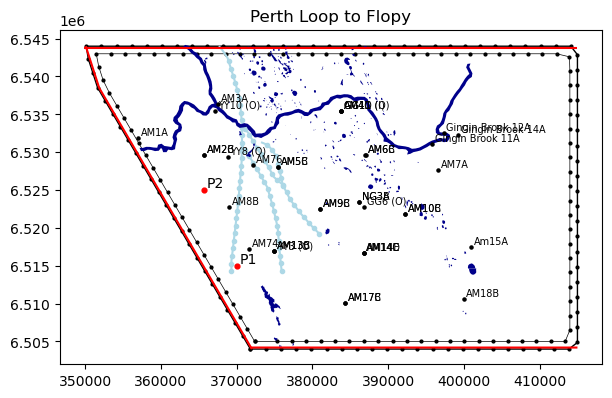

In [7]:
import process_spatial
process_spatial.make_bbox_shp(spatial, x0 = 348000, x1 = 415000, y0 = 6504000, y1 = 6544000)
process_spatial.model_boundary(spatial, boundary_buff = 1000, simplify_tolerance = 1000, node_spacing = 2000)
process_spatial.obs_bores(spatial, observations)
process_spatial.pump_bores(spatial)
process_spatial.head_boundary(spatial)
process_spatial.faults(spatial)
process_spatial.lakes(spatial)
process_spatial.river(spatial, node_spacing = 500, buffer_distance = 200, threshold = 100)
process_spatial.plot_spatial(spatial)


In [8]:
m = spatial.obsbore_gdf.explore(location=[-31.4, 115.8], zoom_start=11, popup = 'ID')
#m = folium.Map(location=[52.0, 4.0], zoom_start=6) 
spatial.model_boundary_gdf.explore(m=m, fill = False)
spatial.faults_gdf.explore(m=m, color = 'red')

### 3. Structural Model

In [9]:
# ------------------------------------------------------
geodata_fname = '../data/data_dwer/geology.xls'
data_sheetname = 'bore_info'
strat_sheetname = 'strat_info'
bbox = [(343000, 6483000, -3000), (408000, 6564000, 500)] #[(x0, y0, z0), (x1, y1, z1)]
from loopflopy.structuralmodel import StructuralModel
structuralmodel = StructuralModel(spatial, bbox, geodata_fname, data_sheetname, strat_sheetname)

import process_structuralmodel 
process_structuralmodel.prepare_strat_column(structuralmodel)
process_structuralmodel.prepare_geodata(structuralmodel, Lleyland = False, Brett = True)
process_structuralmodel.create_structuralmodel(structuralmodel)

here NGG21A  13
here RG2 13
here KR5 13
here AM1 13
here GB5 13
here AM7 13
here AM15 13
here AM18A 13
here AM22 13
here AM26 13
here AM25 13
here AM29 13


c:\Users\00105295\AppData\Local\anaconda3\envs\loopflopy\Lib\site-packages\LoopStructural\modelling\core\geological_model.py:646: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap, n_units)


(9600,) (9600,) (9600,)
(9600,) (9600,) (9600,)
(9600,) (9600,) (9600,)
(9600,) (9600,) (9600,)


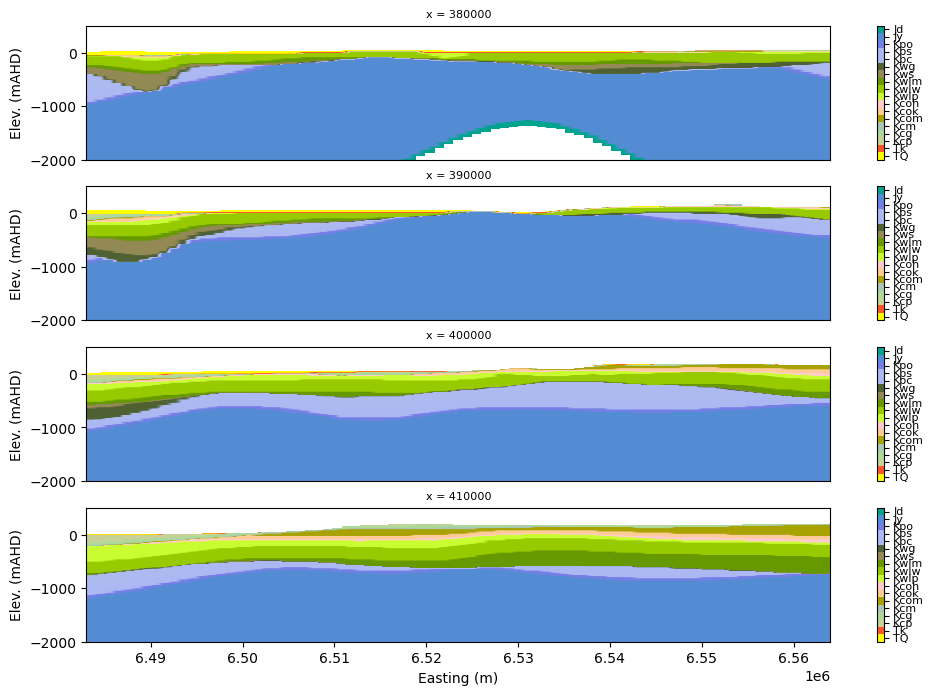

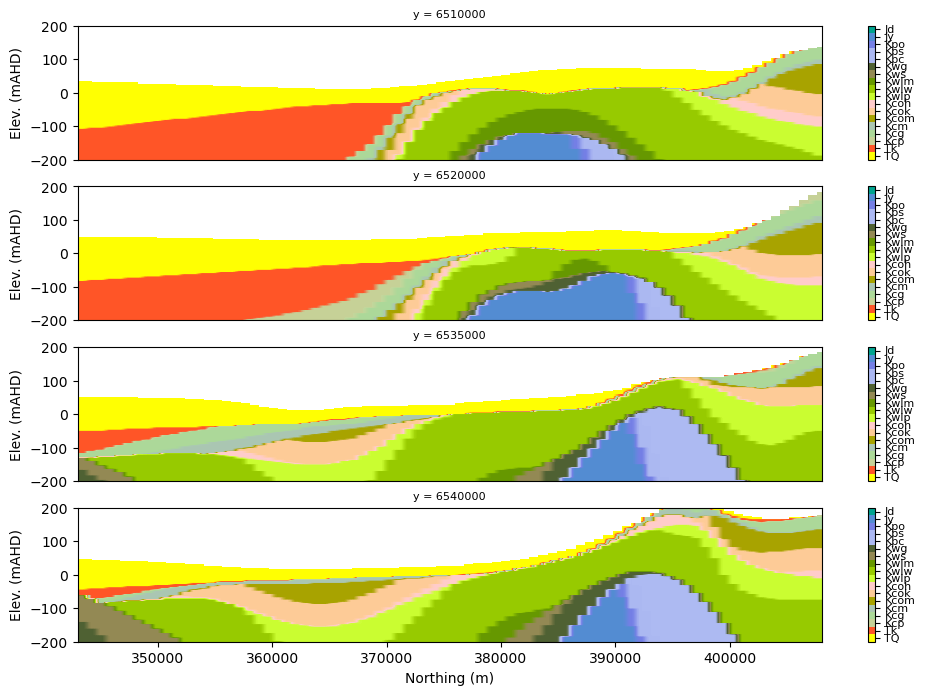

In [36]:
transect_x = [380000, 390000, 400000, 410000]
transect_y = [6510000, 6520000, 6535000, 6540000] 
structuralmodel.plot_xtransects(transect_x, ny = 80, nz = 120, x1 = 6520000, z0 = -2000) 
structuralmodel.plot_ytransects(transect_y, nx = 80, nz = 120, z0 = -200, z1 = 200) 

#structuralmodel.strat 
#structuralmodel.strat_col 
#structuralmodel.strat_names 
#structuralmodel.cmap
#structuralmodel.norm 
#structuralmodel.data

### 4. Contour around surface lithology

Max ground level =  260.91
Min ground level =  -43.6
No special cells
350124.40660379577 6504000.069846243
number of cells in plan =  2500
   Creating Geomodel (lithology and discretisation arrays) for  surf_lith  ...
con, line 241 (18, 2500)
Time taken =  27.550447


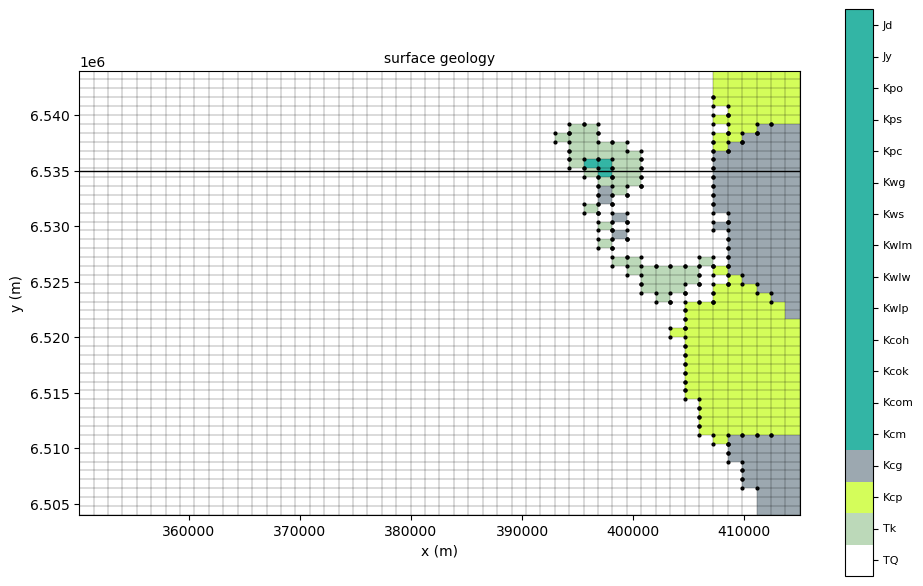

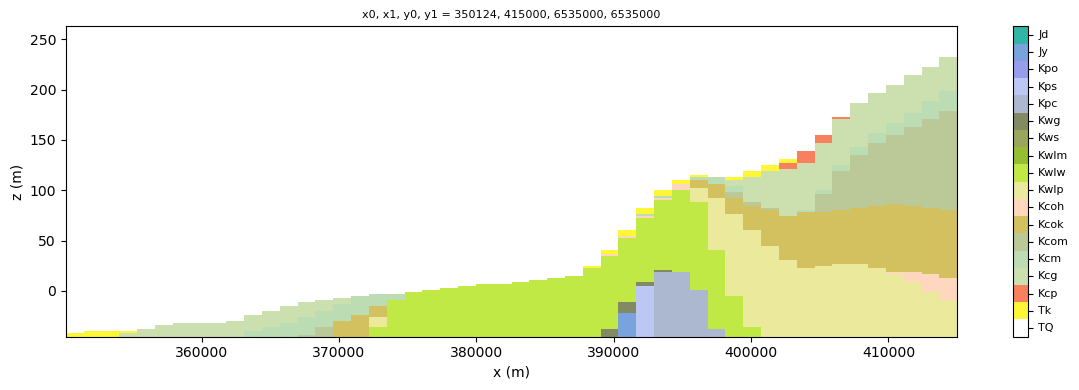

In [11]:
# Pick max and min ground levels
ground_entries = structuralmodel.data[structuralmodel.data['lithcode'] == 'Ground']
max_gl, min_gl = max(ground_entries.Z), min(ground_entries.Z)
print('Max ground level = ', max_gl)
print('Min ground level = ', min_gl)
z0, z1 = min_gl-2, max_gl+2

# Create a structured mesh to detect lithological interfaces
from loopflopy.mesh import Mesh
mesh = Mesh(plangrid = 'car') 
mesh.ncol, mesh.nrow = 50, 50
mesh.create_mesh(project, spatial)
print('number of cells in plan = ', mesh.ncpl)

# Create a geomodel (near surface) to be able to find surface lithology
scenario = 'surf_lith'
vertgrid = 'con'    # 'vox', 'con' or 'con2'
from loopflopy.geomodel import Geomodel
geomodel = Geomodel(scenario, vertgrid, z0, z1, nls = 1, res = 2)#, max_thick = 100. * np.ones((7)))

geomodel.create_lith_dis_arrays(mesh, structuralmodel)
geomodel.vgrid = flopy.discretization.VertexGrid(vertices=mesh.vertices, cell2d=mesh.cell2d, ncpl = mesh.ncpl, top = geomodel.top_geo, botm = geomodel.botm)
geomodel.get_surface_lith()

# Add refinement nodes at surface lithoogy interface
raster = geomodel.surf_lith.reshape((mesh.nrow, mesh.ncol))

# Function to find interfaces and generate nodes
def generate_interface_nodes(raster):
    rows, cols = mesh.nrow, mesh.ncol#raster.shape
    nodes = []

    for i in range(rows - 1):
        for j in range(cols - 1):
            if raster[i, j] != raster[i, j + 1]:
                node = Point(mesh.xcenters[j] + 0.5 * mesh.delx, mesh.ycenters[i] - 0.5 * mesh.dely)
                if node.within(spatial.model_boundary_poly.buffer(-2 * spatial.boundary_buff)): # So that no nodes too close to model boundary 
                    nodes.append(node)
            if raster[i, j] != raster[i + 1, j]:
                node = Point(mesh.xcenters[j] + 0.5 * mesh.delx, mesh.ycenters[i] - 0.5 * mesh.dely)
                if node.within(spatial.model_boundary_poly.buffer(-2 * spatial.boundary_buff)): # So that no nodes too close to model boundary 
                    nodes.append(node)
            if raster[i, j] != raster[i + 1, j + 1]:
                node = Point(mesh.xcenters[j] + 0.5 * mesh.delx, mesh.ycenters[i] - 0.5 * mesh.dely)
                if node.within(spatial.model_boundary_poly.buffer(-2 * spatial.boundary_buff)): # So that no nodes too close to model boundary 
                    nodes.append(node)

    return nodes

nodes = generate_interface_nodes(raster) # Generate nodes at the interfaces
gdf = gpd.GeoDataFrame(crs = spatial.epsg, geometry=nodes) # Create a GeoDataFrame from the nodes
#gdf.crs = spatial.crs
gdf.to_file("../modelfiles/interface_nodes.shp") # Save the nodes as a shapefile
spatial.interface_nodes = list(zip(gdf.geometry.x, gdf.geometry.y)) # Save the nodes as a list of tuples


geomodel.geomodel_plan_lith(spatial, mesh, structuralmodel, y0 = 6535000, y1 = 6535000)
geomodel.geomodel_transect_lith(structuralmodel, spatial, y0 = 6535000, y1 = 6535000)#, z0 = -900, z1 = -2000) 

### 4. Meshing

In [12]:
# Create mesh object
from loopflopy.mesh import Mesh
special_cells = {'chd': ['west'], 
                 'ghb': ['north', 'south'], 
                 'wel': ['pumpbores'], 
                 'obs': ['obsbores'], 
                 #'poly': ['river']
                 }
mesh = Mesh(plangrid = 'tri', special_cells = special_cells) # special cells to identify as arguements 

In [13]:
# Define mesh parameters and create mesh
mesh.modelmaxtri = 2000000
mesh.boundmaxtri = 999999999
mesh.angle = 32   # minimum triangle angles
mesh.radius1 = 50 # 200 radius of inner circle around pumping bores
mesh.radius2 = 200 # 600 radius of outer circle around pumping bores
mesh.boremaxtri = 99999999

mesh.create_bore_refinement(spatial)

node_list = ['faults_nodes', 'bore_refinement_nodes', 'interface_nodes']#, 'river_nodes']
polygon_list = ['model_boundary_poly', 'inner_boundary_poly']

mesh.prepare_nodes_and_polygons(spatial, node_list, polygon_list)
mesh.create_mesh(project, spatial)

print('number of cells in plan = ', mesh.ncpl)


faults_nodes
bore_refinement_nodes
interface_nodes
number of cells in plan =  3223


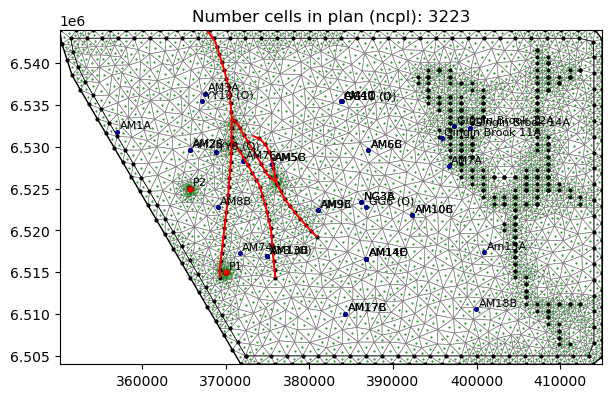

In [14]:

xlim = [spatial.x0 - 2000, spatial.x1 + 2000]
ylim = [spatial.y0 - 2000, spatial.y1 + 2000]

xlim = [355000, 370000]
ylim = [6525000, 6535000]

features = ['wel', 'obs', 'fault']#,'river']
mesh.plot_cell2d(spatial, features)# xlim, ylim)

### 5. Find Cell IDs of spatial features

Group =  chd ['west']
Group =  ghb ['north', 'south']
Group =  wel ['pumpbores']
Group =  obs ['obsbores']


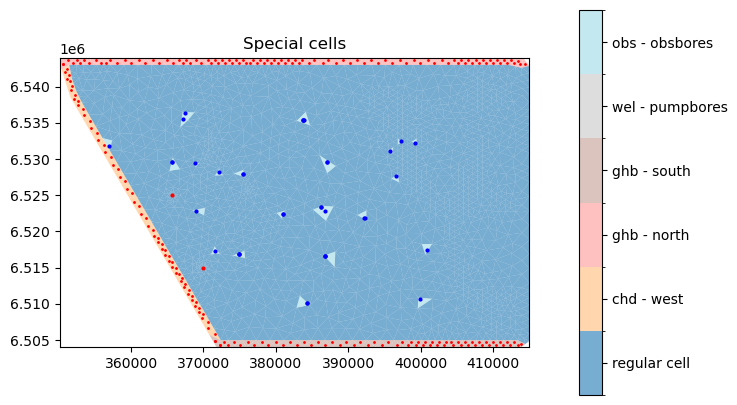

In [15]:
# Locate special cells and plot
mesh.locate_special_cells(spatial)

xlim = [355000, 370000]
ylim = [6525000, 6535000]

mesh.plot_feature_cells(spatial, xlim = None, ylim = None)

### DEM

EPSG:28350
EPSG:28350


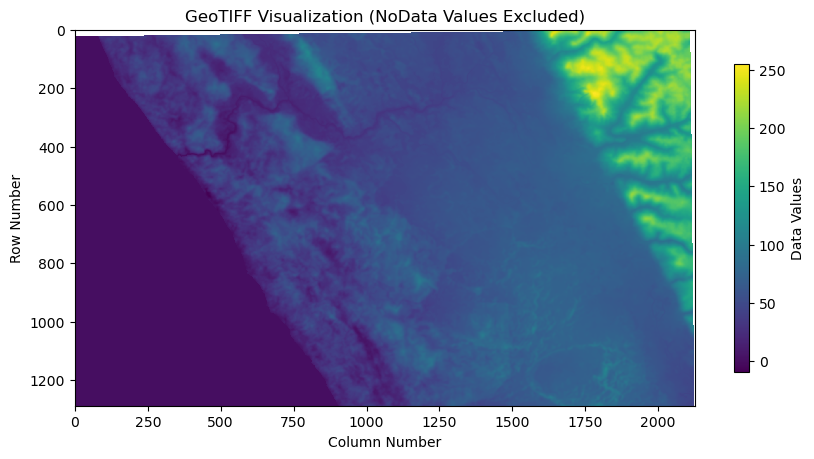

In [16]:
from process_dem import DEM

geotiff_fname = "../data/data_dem/Hydro_Enforced_1_Second_DEM.tif"
uncropped_dem = DEM(geotiff_fname = geotiff_fname)
bbox_path = "../data/data_shp/bbox/bbox.shp"
uncropped_dem.crop_raster(bbox_path)

geotiff_fname = '../data/data_dem/cropped_raster.tif'
cropped_dem = DEM(geotiff_fname = geotiff_fname)
cropped_dem.plot_geotiff()

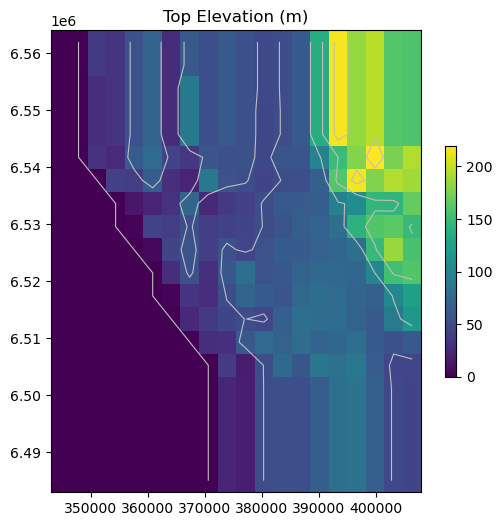

In [18]:
# Resample DEM onto a coarse grid and save as xyz list to be used in structural model
fname = project.workspace + 'topo_xyz.pkl'
cropped_dem.topo = cropped_dem.resample_topo(project, structuralmodel, nrow = 20, ncol = 20, fname = fname)   # This creates a pickle file of resampled x,y,z to use in structural model
#plt.imshow(cropped_dem.topo)
levels = np.arange(-50, 300, 50)
cropped_dem.plot_topo(levels=levels)

In [19]:
fname = project.workspace + 'topo_xyz.pkl'
pickleoff = open(fname,'rb')
topo_xyz = pickle.load(pickleoff)
pickleoff.close()

topo_xyz

[(np.float64(344625.0), np.float64(6561975.0), np.float64(0.0)),
 (np.float64(344625.0), np.float64(6557925.0), np.float64(0.0)),
 (np.float64(344625.0), np.float64(6553875.0), np.float64(36.258975982666016)),
 (np.float64(344625.0), np.float64(6549825.0), np.float64(32.68513107299805)),
 (np.float64(344625.0), np.float64(6545775.0), np.float64(54.73656463623047)),
 (np.float64(344625.0), np.float64(6541725.0), np.float64(69.1153793334961)),
 (np.float64(344625.0), np.float64(6537675.0), np.float64(27.246347427368164)),
 (np.float64(344625.0), np.float64(6533625.0), np.float64(60.09469223022461)),
 (np.float64(344625.0), np.float64(6529575.0), np.float64(53.1578369140625)),
 (np.float64(344625.0), np.float64(6525525.0), np.float64(60.88315200805664)),
 (np.float64(344625.0), np.float64(6521475.0), np.float64(53.708702087402344)),
 (np.float64(344625.0), np.float64(6517425.0), np.float64(48.04072189331055)),
 (np.float64(344625.0), np.float64(6513375.0), np.float64(50.38359832763672)),


### 5. Geomodel

In [20]:
# voxel: nlay, z0, z1
# con:   nls, res
# con2:  nls, res, max_thick

scenario = 's1'
vertgrid = 'con'    # 'vox', 'con' or 'con2'
z0, z1 = -1500, 300

from loopflopy.geomodel import Geomodel
geomodel = Geomodel(scenario, vertgrid, z0, z1, nls = 2, res = 5)#, max_thick = 100. * np.ones((7)))

geomodel.create_lith_dis_arrays(mesh, structuralmodel)
geomodel.vgrid = flopy.discretization.VertexGrid(vertices=mesh.vertices, cell2d=mesh.cell2d, ncpl = mesh.ncpl, top = geomodel.top_geo, botm = geomodel.botm)
geomodel.get_surface_lith()

   Creating Geomodel (lithology and discretisation arrays) for  s1  ...
con, line 241 (36, 3223)
Time taken =  77.123046


In [21]:
print(geomodel.lith_disv[:,30])
print(geomodel.top_geo[30])
print(geomodel.botm_geo[:,30])
print(geomodel.botm[:,30])

[ 0.  0.  1.  1.  2.  2.  3.  3.  4.  4.  5.  5.  6.  6.  7.  7.  8.  8.
  9.  9. 10. 10. 11. 11. 12. 12. 13. 13. 14. 14. 15. 15. 16. 16. 17. 17.]
25.0
[  -30.   -95.  -140.  -185.  -190.  -235.  -300.  -300.  -375.  -605.
  -685.  -685.  -805.  -805.  -805.  -805. -1500. -1500.]
[   -2.5   -30.    -62.5   -95.   -117.5  -140.   -162.5  -185.   -187.5
  -190.   -212.5  -235.   -267.5  -300.   -300.   -300.   -337.5  -375.
  -490.   -605.   -645.   -685.   -685.   -685.   -745.   -805.   -805.
  -805.   -805.   -805.   -805.   -805.  -1152.5 -1500.  -1500.  -1500. ]


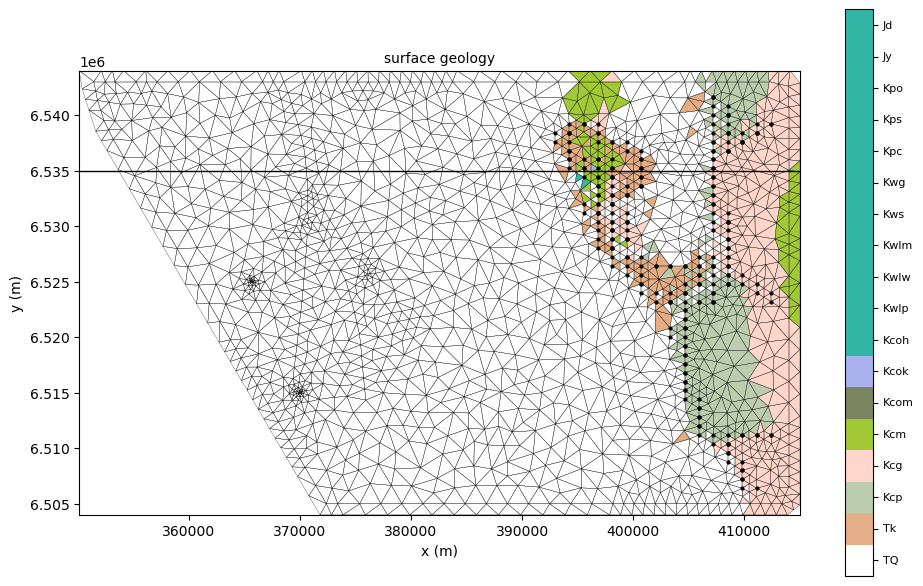

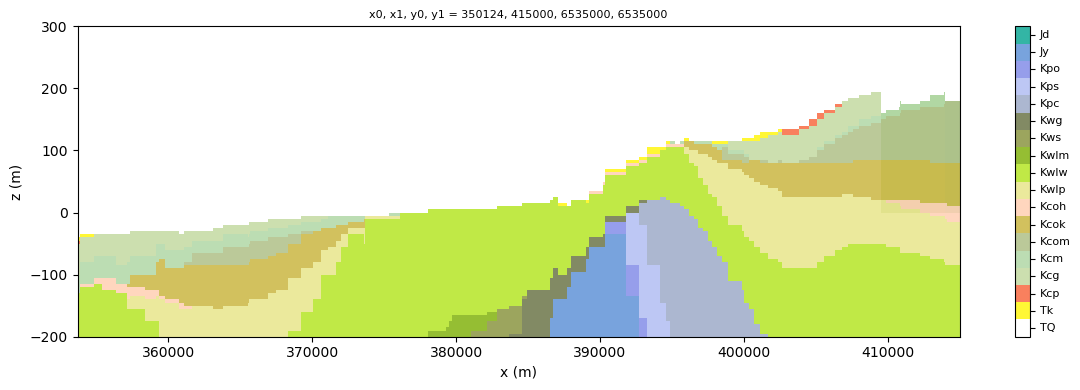

In [37]:
y0, y1 = 6535000, 6535000
geomodel.geomodel_plan_lith(spatial, mesh, structuralmodel, y0=y0, y1=y1)
geomodel.geomodel_transect_lith(structuralmodel, spatial, y0=y0, y1=y1, z0 = -200, z1 = 300)#, z0 = -900, z1 = -2000) 

In [23]:
print(np.unique(geomodel.idomain_geo, return_counts = True))
print(np.unique(geomodel.idomain, return_counts = True))

(array([0., 1.]), array([26546, 31468]))
(array([-1,  1]), array([53092, 62936]))


In [24]:
# FILL CELL PROPERTIES

geomodel.hk_perlay = 10. * np.ones((geomodel.nlg))  #[1., 1., 0.5, 0.1, 0.2, 5., 10.]
geomodel.vk_perlay = 1. * np.ones((geomodel.nlg)) 
geomodel.ss_perlay = 0.00001 * np.ones((geomodel.nlg)) 
geomodel.sy_perlay = 0.1 * np.ones((geomodel.nlg)) 

geomodel.fill_cell_properties(mesh)


   Filling cell properties for  s1  ...
hi  (36, 3223)
Time taken =  0.055017


### 6. Prepare Data for Flowmodel

In [25]:
from process_data import Data
data = Data()

data.process_ic(geomodel, mesh)
data.process_rch(mesh)
data.process_chd(geomodel, mesh)

wel_q = [-0, -0]
wel_qlay= [5, 2]
data.process_wel(geomodel, mesh, spatial, wel_q, wel_qlay)


40
88
[(np.float64(-190.0), np.float64(-240.0)), (np.float64(-95.0), np.float64(-125.0))]


### 7. Prepare Observations

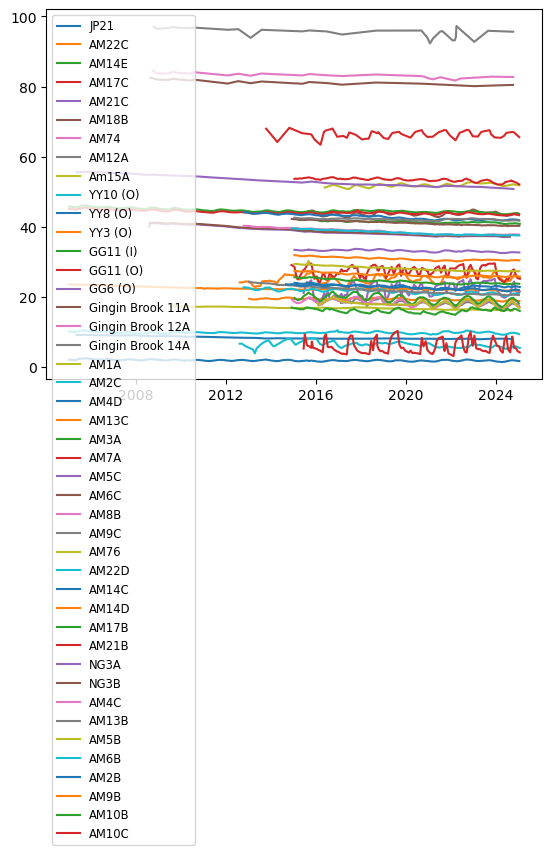

In [29]:
df_obs = process_observations.add_WL_obs(observations.df_boredetails)
process_observations.plot_leederville_hydrographs(df_obs)
process_observations.plot_yarragadee_hydrographs(df_obs)
observations.process_obs(spatial, geomodel, mesh)

### 8. Create and run steady-state flow model

In [30]:
from loopflopy.flowmodel import Flowmodel
project.mfexe_name = '../exe/mf6.exe'
scenario = 'steadymodel'

fm = Flowmodel(scenario, project, data, observations, mesh, geomodel)
fm.lith = geomodel.lith
fm.logk11 = geomodel.logk11
fm.logk33 = geomodel.logk33
len(fm.lith.flatten())

62936

In [31]:
# Write and run flow model files
sim = fm.write_flowmodel(chd = True, wel = True, obs = False, rch = True)
fm.run_flowmodel(sim)

   Writing simulation and gwf for  steadymodel  ...
   Time taken to write flow model =  22.124243
Running simulation for  steadymodel  ...
Model success =  False
   run_time =  1.37315
   Re-writing IMS - Take 2
Model success2 =  False
   Re-writing IMS - Take 3
Model success3 =  False


In [ ]:
obj = fmss
methods = [func for func in dir(obj) if callable(getattr(obj, func)) and not func.startswith("__")]
print("Methods in the class:  ",methods)
attributes = [attr for attr in dir(obj) if not callable(getattr(obj, attr)) and not attr.startswith("__")]
print("\nAttributes in the class:  ", attributes)

#for attribute, value in flowmodel.data.__dict__.items(): print(attribute)

In [ ]:
import plotting_routines

#vmin, vmax = min(flowmodel.head.flatten()), max(flowmodel.head.flatten())
extent = [spatial.x0, spatial.x1, spatial.y0, spatial.y1]
X0, X1, Y0, Y1 = spatial.x0, spatial.x1, 7440000, 7440000
plotting_routines.plot_watertable(spatial, mesh, geomodel, fmss, watertable, extent = extent)#, vmin=vmin, vmax=vmax)
plotting_routines.plot_transect(spatial, fmss, array, X0, X1, Y0, Y1)#, vmin, vmax)

### 9. Create and run transient flow model

In [ ]:
scenario = 'transientmodel'
well_q = [-2000, -2000]
data.process_wel(geomodel, mesh, spatial, well_q, wel_qlay)
data.strt = fmss.head
flowmodel = Flowmodel(scenario, project, data, observations, mesh, geomodel)

perlen = 2 * 365 # length of period (days)
nts = 12         # number of time steps for this period
flowmodel.perioddata = [(perlen, nts, 1.1)] # perlen, nts, tsmult

In [ ]:
sim = flowmodel.write_flowmodel(transient = True, chd = True, wel = True, obs = True, rch = True)

In [ ]:
flowmodel.run_flowmodel(sim, transient = True)

In [ ]:
watertable = flowmodel.get_watertable(geomodel, flowmodel.head)

### 10. Visualise Results

In [ ]:
import plotting_routines

vmin, vmax = 495, 505 #min(flowmodel.head.flatten()), max(flowmodel.head.flatten())
extent = [spatial.x0, spatial.x1, spatial.y0, spatial.y1]
X0, X1, Y0, Y1 = spatial.x0, spatial.x1, 7440000, 7440000
plotting_routines.plot_watertable(spatial, mesh, geomodel, flowmodel, watertable, extent = extent)#, vmin=vmin, vmax=vmax)
plotting_routines.plot_transect(spatial, flowmodel, array, X0, X1, Y0, Y1)#, vmin, vmax)

# PLOT BY LAYER
#from plotting_routines import plot_plan
#array = 'head'
#layer = 0
#plot_plan(spatial, mesh, flowmodel, array, layer, extent = extent, vmin=vmin, vmax=vmax, vectors = True)

### 11. Forecasting

In [ ]:

class Forecast:
    def __init__(self, name):
        self.name = name

forecast = Forecast('forecast_scenario_1')
forecast.qwell = [-200000, -200000] #m3/d 


In [ ]:
scrap code

# FOR TRANSIENT
rch_list = []
for index, row in df.iterrows(): 
    for i in range(4,16): # Jan-Dec
        rch_list.append(row.iloc[i]/1000) # mm to m

nper = len(rch_list)
ncpl = len(cell2d)

# FOR HFB IF WE USE

# import disv2disu # MODFLOW Tools
# Disv2Disu = disv2disu.Disv2Disu    
# nlay = 1
# botm = np.zeros_like(top).reshape(1, len(cell2d))
# idomain = np.ones_like(top).reshape(1, len(cell2d))
# dv2d = Disv2Disu(vertices, cell2d, top, botm, staggered=False, disv_idomain = idomain)
# dv2d._neighbors
# #dv2d._edge_set
# 
# dyke_K, dyke_width = 0.0001, 2  
# hydchr = dyke_K / dyke_width  
# 
# # Set up Horizontal Flow Barrier (HFB)
# for n in range(gdf.shape[0]): # For each dyke...
#     # Vertical
#     for lay in range(nlay):
#         for cell ibd[cell]
#         if zc[lay, icpl] < dyke_top[n]: 
#             hfb.append(([lay, cellid_1], [k, cellid_2], hydchr))

#### FAULT
#P.fault_buffer = 800

# Import fault shape file
#bada_shp = gpd.read_file('../data/shp/badaminna_trace.shp')
#bada_shp.to_crs(epsg=28350, inplace=True)
#bada_shp = gpd.clip(bada_shp, model_boundary)

#from meshing_routines import prepare_fault_nodes_voronoi
#fault_refinement_nodes = prepare_fault_nodes_voronoi(P, '../data/shp/badaminna_trace.shp', model_boundary, inner_boundary)

In [ ]:
import itertools

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation


def data_gen():
    for cnt in itertools.count():
        t = cnt / 10
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 1)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

# Only save last 100 frames, but run forever
ani = animation.FuncAnimation(fig, run, data_gen, interval=100, init_func=init,
                              save_count=100)
plt.show()

In [ ]:
# METHOD BARDOT 2024
from meshing_routines import resample_linestring
import itertools
from datetime import datetime

t0 = datetime.now()

def voronoi_nodes_gdf(gdf, refinement_boundary_poly, buffer):

    dyke = []
    hfb_1, hfb_2 = [], []
    nodes = []
    
    for n in range(gdf.shape[0]): 
        
        # Dykes notes (on the dyke linestring)
        linestring = dykes_gdf.geometry[n]
        r = 2*buffer/3 # distance between points
        ls_resample = resample_linestring(linestring, r) # resample orginal dyke line
        dyke.append(ls_resample)
        
        # Refinement nodes
        offsets = [-1.5*r, -0.5*r, 0.5*r, 1.5*r]
        fault_offset_lines = []
        for i, offset in enumerate(offsets):
            ls = linestring.parallel_offset(offset) # linestring.parallel_offset
            ls_resample = resample_linestring(ls, r)
            
            p = []
            for point in ls_resample:
                x,y = point.x, point.y
                p.append((x,y))
                #if refinement_boundary_poly.contains(point):
                #    x,y = point.x, point.y
                #    p.append((x,y))
            
            if len(p) != 1: # just incase there is a 1 point linestring
                offset_ls = LineString(p)
                coords = list(offset_ls.coords)
                fault_offset_lines.append(coords) 
                if i == 1: # SIDE 1
                    hfb_1.append(coords)
                if i == 2: # SIDE 2
                    hfb_2.append(coords)
                
        nodes.append([tup for line in fault_offset_lines for tup in line]) 
    refinement_nodes = list(itertools.chain.from_iterable(nodes))

    return(refinement_nodes, hfb_1, hfb_2)

# Import dykes shape file
dykes_gdf = gpd.read_file('../data_shp/dykes_m.shp')
dykes_gdf.to_crs(epsg=28350, inplace=True)
dykes_gdf = gpd.clip(dykes_gdf, inner_boundary_poly).reset_index(drop=True)
#dykes_gdf.plot()

dyke_nodes, hfb_1, hfb_2 = voronoi_nodes_gdf(dykes_gdf, refinement_boundary_poly, buffer)

t1 = datetime.now()
print(t1 - t0) 

In [ ]:

from sklearn.cluster import DBSCAN
from alphashape import alphashape

def create_surfacegeo_polys(geomodel, lith):
    points = []
    a = np.array(mesh.cell2d)
    b = a[geomodel.surf_lith==lith]
    verts = np.unique(b[:,4:7].flatten())
    verts = [int(x) for x in verts]
    vert_coords = []
    for v in verts:
        vert_coords.append(mesh.vertices[v][1:3])
    xlist, ylist = list(zip(*vert_coords))
    gdf = gpd.GeoDataFrame(pd.DataFrame({'x': xlist, 'y': ylist}), 
                           geometry = gpd.points_from_xy(x = xlist, y = ylist))
    # Extract coordinates for clustering
    coords = gdf.geometry.apply(lambda geom: (geom.x, geom.y)).tolist()
    
   # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=5000, min_samples=3)  # eps: max distance for clustering
    gdf['cluster'] = dbscan.fit_predict(coords)
    
    # Create concave hulls for each cluster
    hulls = []
    for cluster_id in gdf['cluster'].unique():
        
        if cluster_id != -1:  # Exclude noise points
            cluster_points = gdf[gdf['cluster'] == cluster_id]
            print('\ncluster id = ', cluster_id, ', number of points = ', len(cluster_points))
            points_list = cluster_points.geometry.apply(lambda p: (p.x, p.y)).tolist()
            
            # CONCAVE
            mp = MultiPoint(points_list)
            gs = gpd.GeoSeries(mp)
            hull = gs.concave_hull(ratio = 0.2, allow_holes = False)
            hulls.append(hull)
    
    hull_gdf = gpd.GeoDataFrame(pd.concat(hulls, ignore_index=True), columns=['geometry'])
    return (gdf, hull_gdf)

def plot_geology_polygons(gdf, hull_gdf):
    # Plot results
    fig, ax = plt.subplots()
    gdf.plot(ax=ax, color='blue', markersize=3, label='Points')
    hull_gdf.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=1, label='Concave Hulls')
    plt.legend()
    plt.show()

for i in range(7):
    gdf, hull_gdf = create_surfacegeo_polys(geomodel, i)
    plot_geology_polygons(gdf, hull_gdf)

In [ ]:
print(structuralmodel.model.bounding_box.nsteps)
structuralmodel.model.bounding_box.nelements = 1e6
print(structuralmodel.model.bounding_box.nsteps)

# Extract surfaces
surfaces = structuralmodel.model.get_stratigraphic_surfaces()

# Interpolate onto a structured grid
from LoopStructural.interpolators.supports import P1Unstructured2d, StructuredGrid2D
loopmesh = P1Unstructured2d(surfaces[0].triangles, surfaces[0].vertices[:, 0:2], surfaces[0].triangles[:, 0:3]) # Ground is surfaces [0] (ELEMENTS, VERTICES, NEIGHBOURS)
# loopmesh
#dx, dy = 1000, 1000 # 1000m cells
#nx = int((structuralmodel.x1 - structuralmodel.x0)/dx)
#ny = int((structuralmodel.y1 - structuralmodel.y0)/dy)
#structured2d = StructuredGrid2D(origin=[structuralmodel.x0, structuralmodel.y0], nsteps=[nx, ny], step_vector= [dx, dy])
pts = mesh.xcyc  #structured2d.barycentre # replace with my xcyc
z = loopmesh.evaluate_value(pts, surfaces[0].vertices[:, 2])
np.unique(z)
## we expect the values to be close to zero depending on the resultion of the interpolation
#geomodel["Ground"].evaluate_value(np.hstack([pts, z[:, np.newaxis]]))

surface = structuralmodel.model['Ground'].surfaces([0])[0]
#surfaces = structuralmodel.model.get_stratigraphic_surfaces(units = ['Ground'])
p = Loop3DView(structuralmodel.model)
p.plot_model_surfaces()
for s in surfaces:
    p.add_mesh(s.vtk())
p.add_points(surface.vertices)
#p.add_mesh(surfaces[0].vtk)
p.show()

from LoopStructural.visualisation import Loop3DView
p = Loop3DView(structuralmodel.model)
p.plot_model_surfaces()

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1, aspect="equal")
pmv = flopy.plot.PlotMapView(modelgrid=geomodel.vgrid)
arr = pmv.plot_array(geomodel.idomain[0], alpha = 0.6) #(M.botm_geo[0], alpha = 0.6)
mesh.tri.plot(ax=ax, edgecolor='black', lw = 0.1)
cbar = fig.colorbar(arr, ax=ax, shrink = 0.5)  

In [ ]:
def print_object_details(obj):
    all_attributes_methods = dir(obj)
    methods = [attr for attr in all_attributes_methods if callable(getattr(obj, attr)) and not attr.startswith("__")]
    variables = [attr for attr in all_attributes_methods if not callable(getattr(obj, attr)) and not attr.startswith("__")]

    print('Methods:')
    for method in methods: print(method)
    print("\nVariables")
    for variable in variables: print(variable)

In [ ]:
from sklearn.cluster import DBSCAN
from alphashape import alphashape

def create_surfacegeo_polys(geomodel, lith):
    points = []
    a = np.array(mesh.cell2d)
    b = a[geomodel.surf_lith==lith]
    verts = np.unique(b[:,4:7].flatten())
    verts = [int(x) for x in verts]
    vert_coords = []
    for v in verts:
        vert_coords.append(mesh.vertices[v][1:3])
    xlist, ylist = list(zip(*vert_coords))
    gdf = gpd.GeoDataFrame(pd.DataFrame({'x': xlist, 'y': ylist}), 
                           geometry = gpd.points_from_xy(x = xlist, y = ylist))
    # Extract coordinates for clustering
    coords = gdf.geometry.apply(lambda geom: (geom.x, geom.y)).tolist()
    
   # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=5000, min_samples=3)  # eps: max distance for clustering
    gdf['cluster'] = dbscan.fit_predict(coords)
    
    # Create concave hulls for each cluster
    hulls = []
    for cluster_id in gdf['cluster'].unique():
        
        if cluster_id != -1:  # Exclude noise points
            cluster_points = gdf[gdf['cluster'] == cluster_id]
            print('\ncluster id = ', cluster_id, ', number of points = ', len(cluster_points))
            points_list = cluster_points.geometry.apply(lambda p: (p.x, p.y)).tolist()
            
            # CONCAVE
            mp = MultiPoint(points_list)
            gs = gpd.GeoSeries(mp)
            hull = gs.concave_hull(ratio = 0.3, allow_holes = True)#False)
            hulls.append(hull)
    
    hull_gdf = gpd.GeoDataFrame(pd.concat(hulls, ignore_index=True), columns=['geometry'])
    return (gdf, hull_gdf)

unique_surf_liths = np.unique(geomodel.surf_lith)

def smooth_polygons(polygon, buffer_distance=0.001):
    return polygon.buffer(buffer_distance).buffer(-buffer_distance)
def is_even(number):
    return number % 2 == 0

polygons = []
for i, lith in enumerate(unique_surf_liths):
    if not is_even(i): # only create polygons for even lithologies so boundaries dont overlap
        gdf, hull_gdf = create_surfacegeo_polys(geomodel, lith)
        gs = hull_gdf.geometry.apply(lambda geom: shape(geom))
        print(type(gs))
        print(gs)
        smoothed_gs = gs.apply(smooth_polygons)
        for smoothed_poly in smoothed_gs:
            polygons.append(smoothed_poly)
    

    fig, ax = plt.subplots()
    ax.set_title('Lithology' + str(lith))
    gdf.plot(ax=ax, color='blue', markersize=3, label='Points')
    hull_gdf.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=1, label='Concave Hulls')
    plt.show()

lith_boundaries_gdf = gpd.GeoDataFrame(geometry=polygons)
fig, ax = plt.subplots()
ax.set_title('Lithology boundaries')
lith_boundaries_gdf.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=1)
plt.show()
    


In [ ]:
#def create_fine_grid(X, Y, num_points=500):
#    x_fine = np.linspace(X.min(), X.max(), num_points)
#    y_fine = np.linspace(Y.min(), Y.max(), num_points)
#    X_fine, Y_fine = np.meshgrid(x_fine, y_fine)
#    return X_fine, Y_fine
#
#def interpolate_data(X, Y, Z, X_fine, Y_fine):
#    from scipy.interpolate import griddata
#    Z_fine = griddata((X.flatten(), Y.flatten()), Z.flatten(), (X_fine, Y_fine), method='cubic')
#    return Z_fine

#def plot_smooth_contours(X_fine, Y_fine, Z_fine, levels=10):
#    plt.figure(figsize=(8, 6))
#    contour = plt.contour(X_fine, Y_fine, Z_fine, levels=levels, cmap='viridis')
#    plt.colorbar(contour)
#    plt.title('Smooth Contour Lines')
#    plt.xlabel('X')
#    plt.ylabel('Y')
#    plt.show()
#    return contour

def plot_contours(X, Y, Z, levels=10):
    plt.figure(figsize=(8, 6))
    contour = plt.contour(X, Y, Z, levels=levels, cmap='viridis')
    plt.colorbar(contour)
    plt.title('Contour Lines')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    return contour

def extract_contour_lines(contour):
    contour_lines = []
    for collection in contour.collections:
        for path in collection.get_paths():
            v = path.vertices
            contour_lines.append(LineString(v))
    return contour_lines

def save_contour_lines_to_shapefile(contour_lines, filename):
    gdf = gpd.GeoDataFrame(geometry=contour_lines)
    gdf.to_file(filename)


#X_fine, Y_fine = create_fine_grid(X, Y)
#Z_fine = interpolate_data(X, Y, Z, X_fine, Y_fine)
#plt.imshow(Z_fine)
#levels =[-0.09, 0.01, 1.01, 2.01, 3.01, 4.01,]
X, Y = mesh.xcenters, mesh.ycenters
Z = geomodel.surf_lith.reshape(mesh.nrow, mesh.ncol)
contour = plot_contours(X, Y, Z, levels =levels)
contour_lines = extract_contour_lines(contour)
save_contour_lines_to_shapefile(contour_lines, "contour_lines.shp")